# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [2]:
library('tidyverse')
library('patchwork')
library('scales')

In [3]:
# read the data
data = read_csv(
    'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-08-04/energy_types.csv',
    col_types = cols()
)

# Modify the column name of the data
names(data) = c('country', 'country_name', 'type', 'level', 'year_2016', 'year_2017', 'year_2018')

data %>% head(10)

country,country_name,type,level,year_2016,year_2017,year_2018
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
BE,Belgium,Conventional thermal,Level 1,30728,31316.00,30092.635
BE,Belgium,Nuclear,Level 1,41430,40128.50,26995.628
BE,Belgium,Hydro,Level 1,1476,1360.90,1239.248
BE,Belgium,Pumped hydro power,Level 2,1110,1093.20,983.190
BE,Belgium,Wind,Level 1,5340,6387.90,7177.346
BE,Belgium,Solar,Level 1,3070,3264.30,3488.979
BE,Belgium,Geothermal,Level 1,0,0.00,0.000
BE,Belgium,Other,Level 1,476,490.90,218.509
BG,Bulgaria,Conventional thermal,Level 1,18909,20234.21,19334.000


In [4]:
data_type_sum = data %>% 
                group_by(type) %>%
                summarize(sum_2016 = sum(year_2016), sum_2017 = sum(year_2017), sum_2018 = sum(year_2018))

data_type_sum

type,sum_2016,sum_2017,sum_2018
<chr>,<dbl>,<dbl>,<dbl>
Conventional thermal,1801451.654,1838782.375,1704429.420
Geothermal,10281.953,11393.977,12443.754
Hydro,631263.647,564248.938,611993.531
Nuclear,871560.205,866210.980,868333.983
Other,5670.308,5691.438,8019.144
Pumped hydro power,32889.277,33442.817,50153.928
Solar,111948.354,121909.507,130968.490
Wind,318809.583,379963.520,401332.380


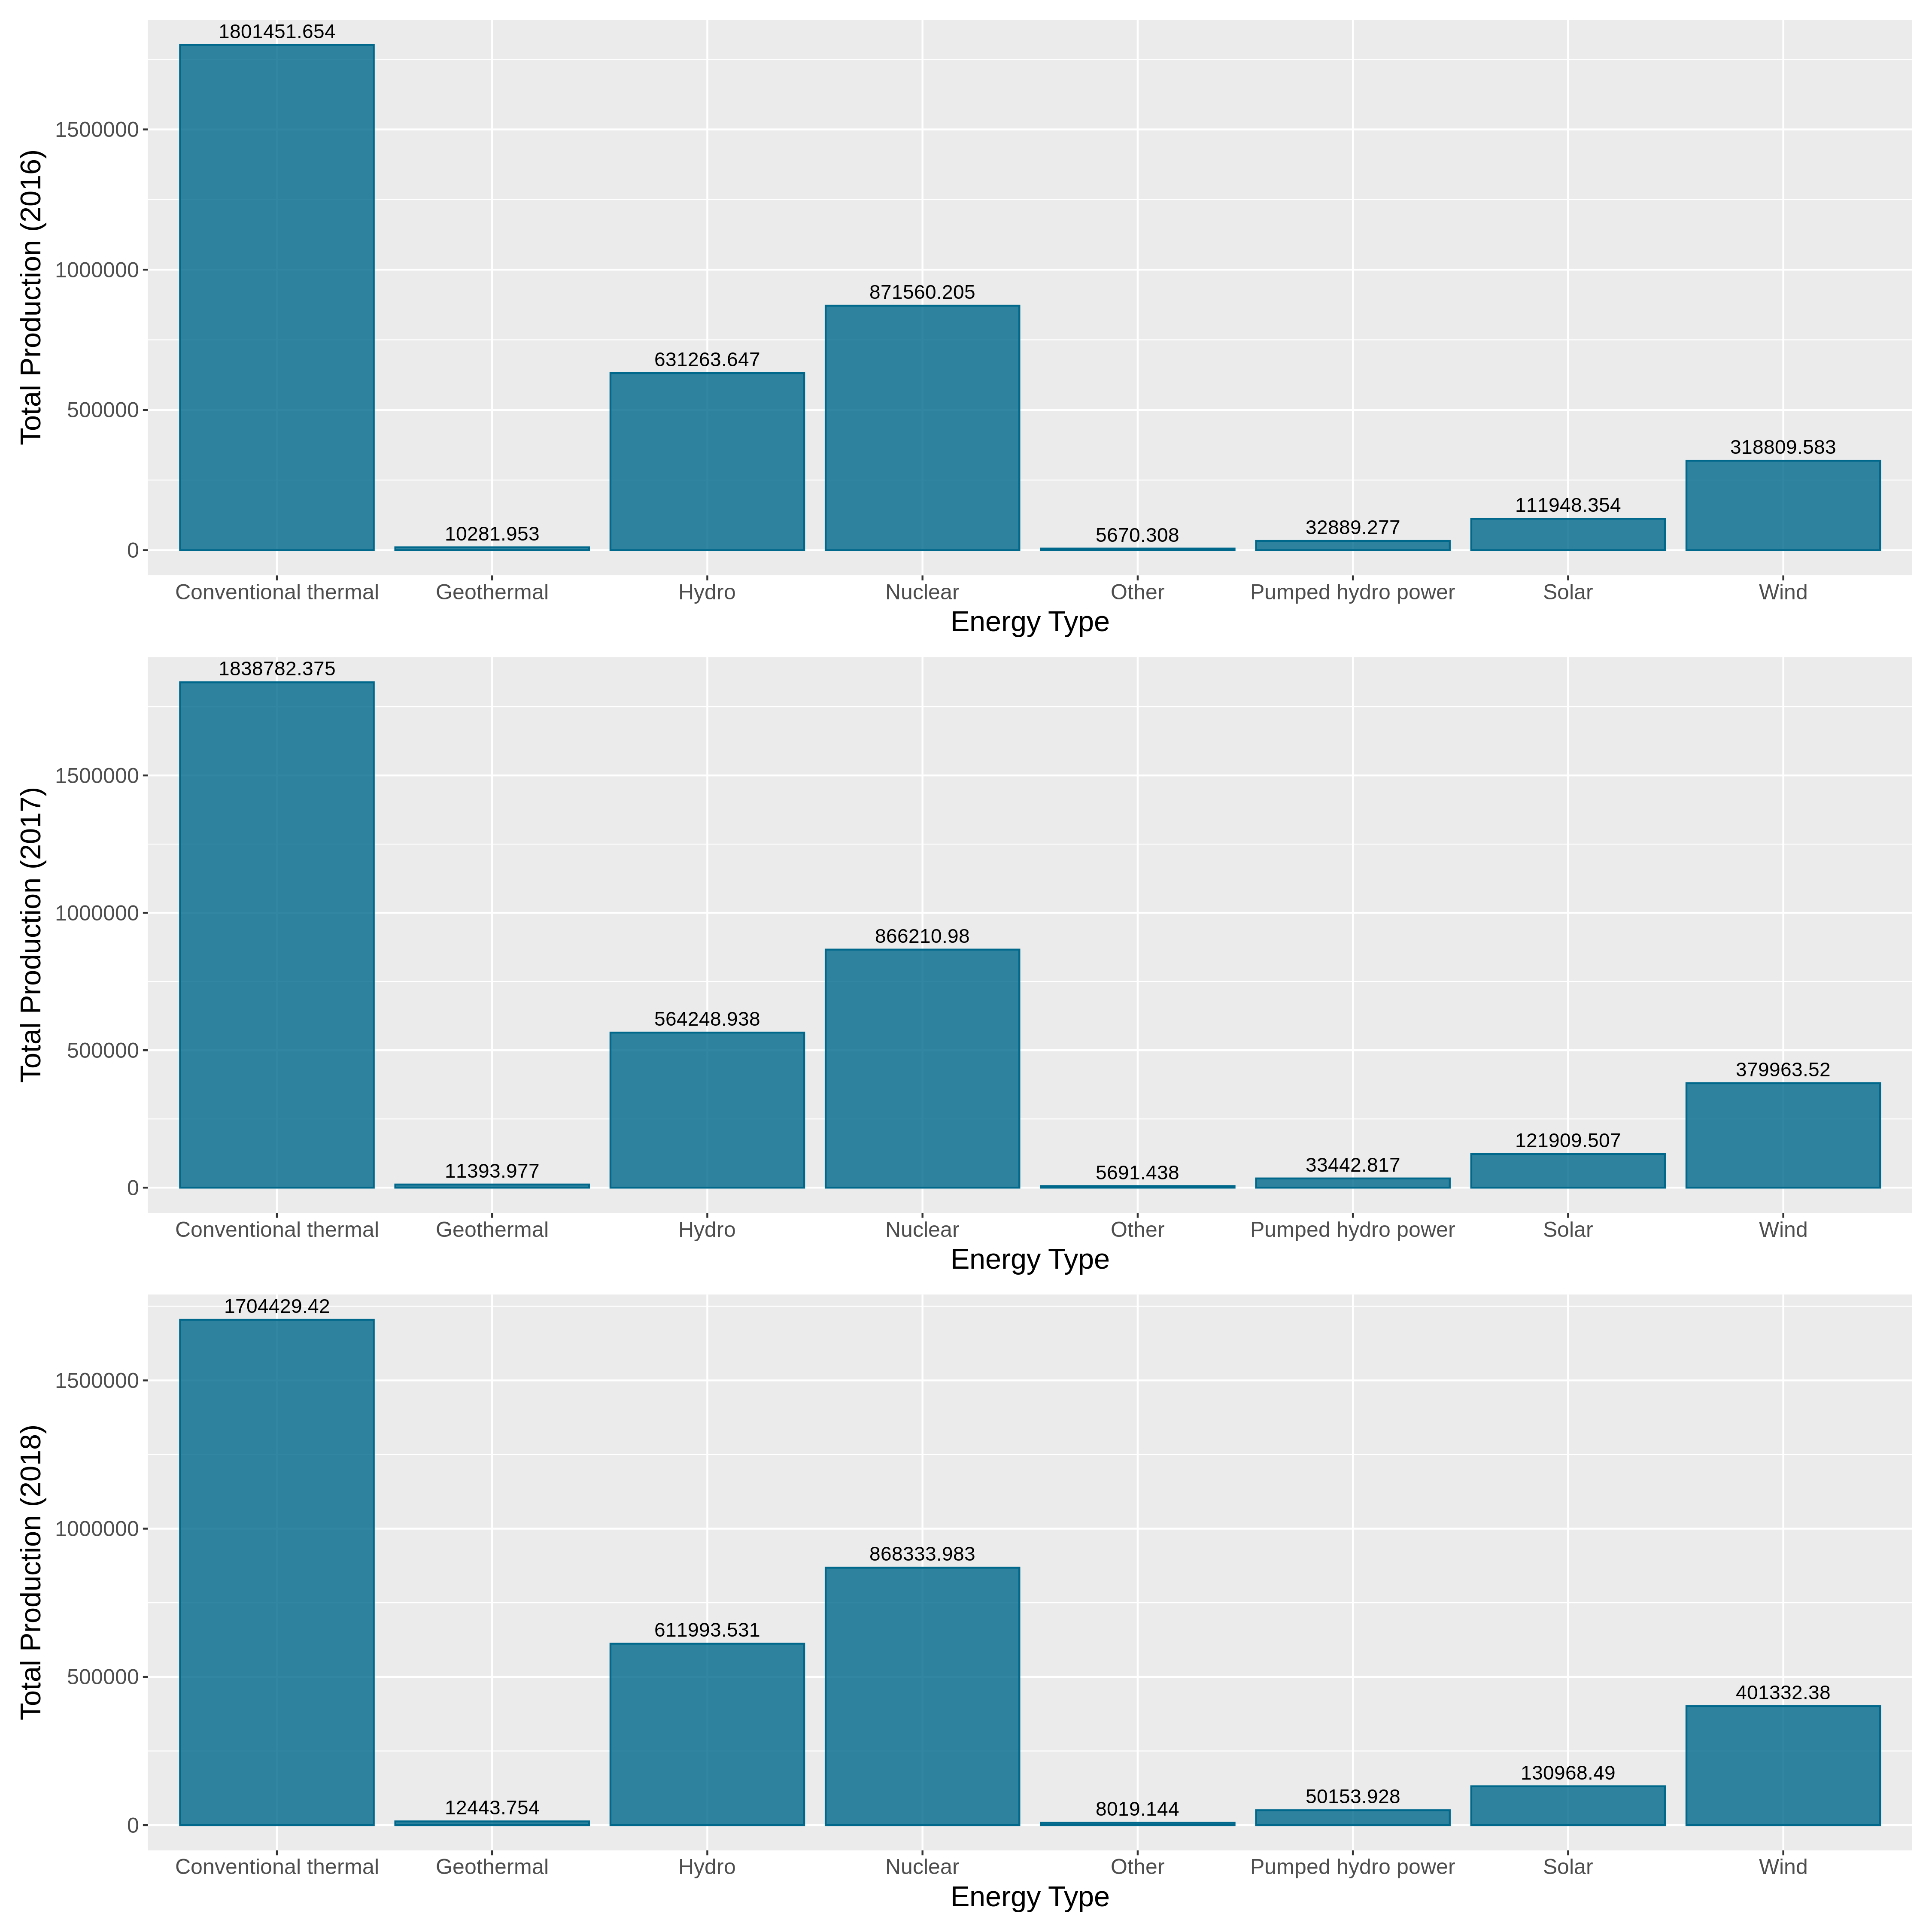

In [5]:
options(repr.plot.width=15, repr.plot.height=15, repr.plot.res = 300)

p_sum_2016 = ggplot(data_type_sum, aes(x = type, y = sum_2016)) + 
        geom_col(color = 'deepskyblue4', fill = 'deepskyblue4', alpha = 0.8) + 
        geom_text(aes(label = sum_2016, vjust = -0.5)) +
        labs(x = 'Energy Type', y = 'Total Production (2016)') + 
        theme(axis.text = element_text(size = 12), axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16, vjust = 1))

p_sum_2017 = ggplot(data_type_sum, aes(x = type, y = sum_2017)) + 
        geom_col(color = 'deepskyblue4', fill = 'deepskyblue4', alpha = 0.8) + 
        geom_text(aes(label = sum_2017, vjust = -0.5)) + 
        labs(x = 'Energy Type', y = 'Total Production (2017)') + 
        theme(axis.text = element_text(size = 12), axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16, vjust = 1))

p_sum_2018 = ggplot(data_type_sum, aes(x = type, y = sum_2018)) + 
        geom_col(color = 'deepskyblue4', fill = 'deepskyblue4', alpha = 0.8) + 
        geom_text(aes(label = sum_2018, vjust = -0.5)) + 
        labs(x = 'Energy Type', y = 'Total Production (2018)') + 
        theme(axis.text = element_text(size = 12), axis.title.x = element_text(size = 16), axis.title.y = element_text(size = 16, vjust = 1))

p_sum_2016 / p_sum_2017 / p_sum_2018

For the 8 energy types in the data, I would to see which has the highest proportion of energy production. As can be seen from the above figure, in 2016, 2017, and 2018, the production of the Conventional thermal, Nuclear and Hydro, accounted for the highest proportion, and it was much higher than other types of energy.

In [6]:
data_type_sum_pivot = data_type_sum %>%
                    pivot_longer(cols = c(sum_2016, sum_2017, sum_2018))

# data_type_sum_pivot = data.frame(lapply(data_type_sum_pivot, function(x){
#     gsub('sum_', '', x)
# }))

data_type_sum_pivot

type,name,value
<chr>,<chr>,<dbl>
Conventional thermal,sum_2016,1801451.654
Conventional thermal,sum_2017,1838782.375
Conventional thermal,sum_2018,1704429.420
Geothermal,sum_2016,10281.953
Geothermal,sum_2017,11393.977
Geothermal,sum_2018,12443.754
Hydro,sum_2016,631263.647
Hydro,sum_2017,564248.938
Hydro,sum_2018,611993.531


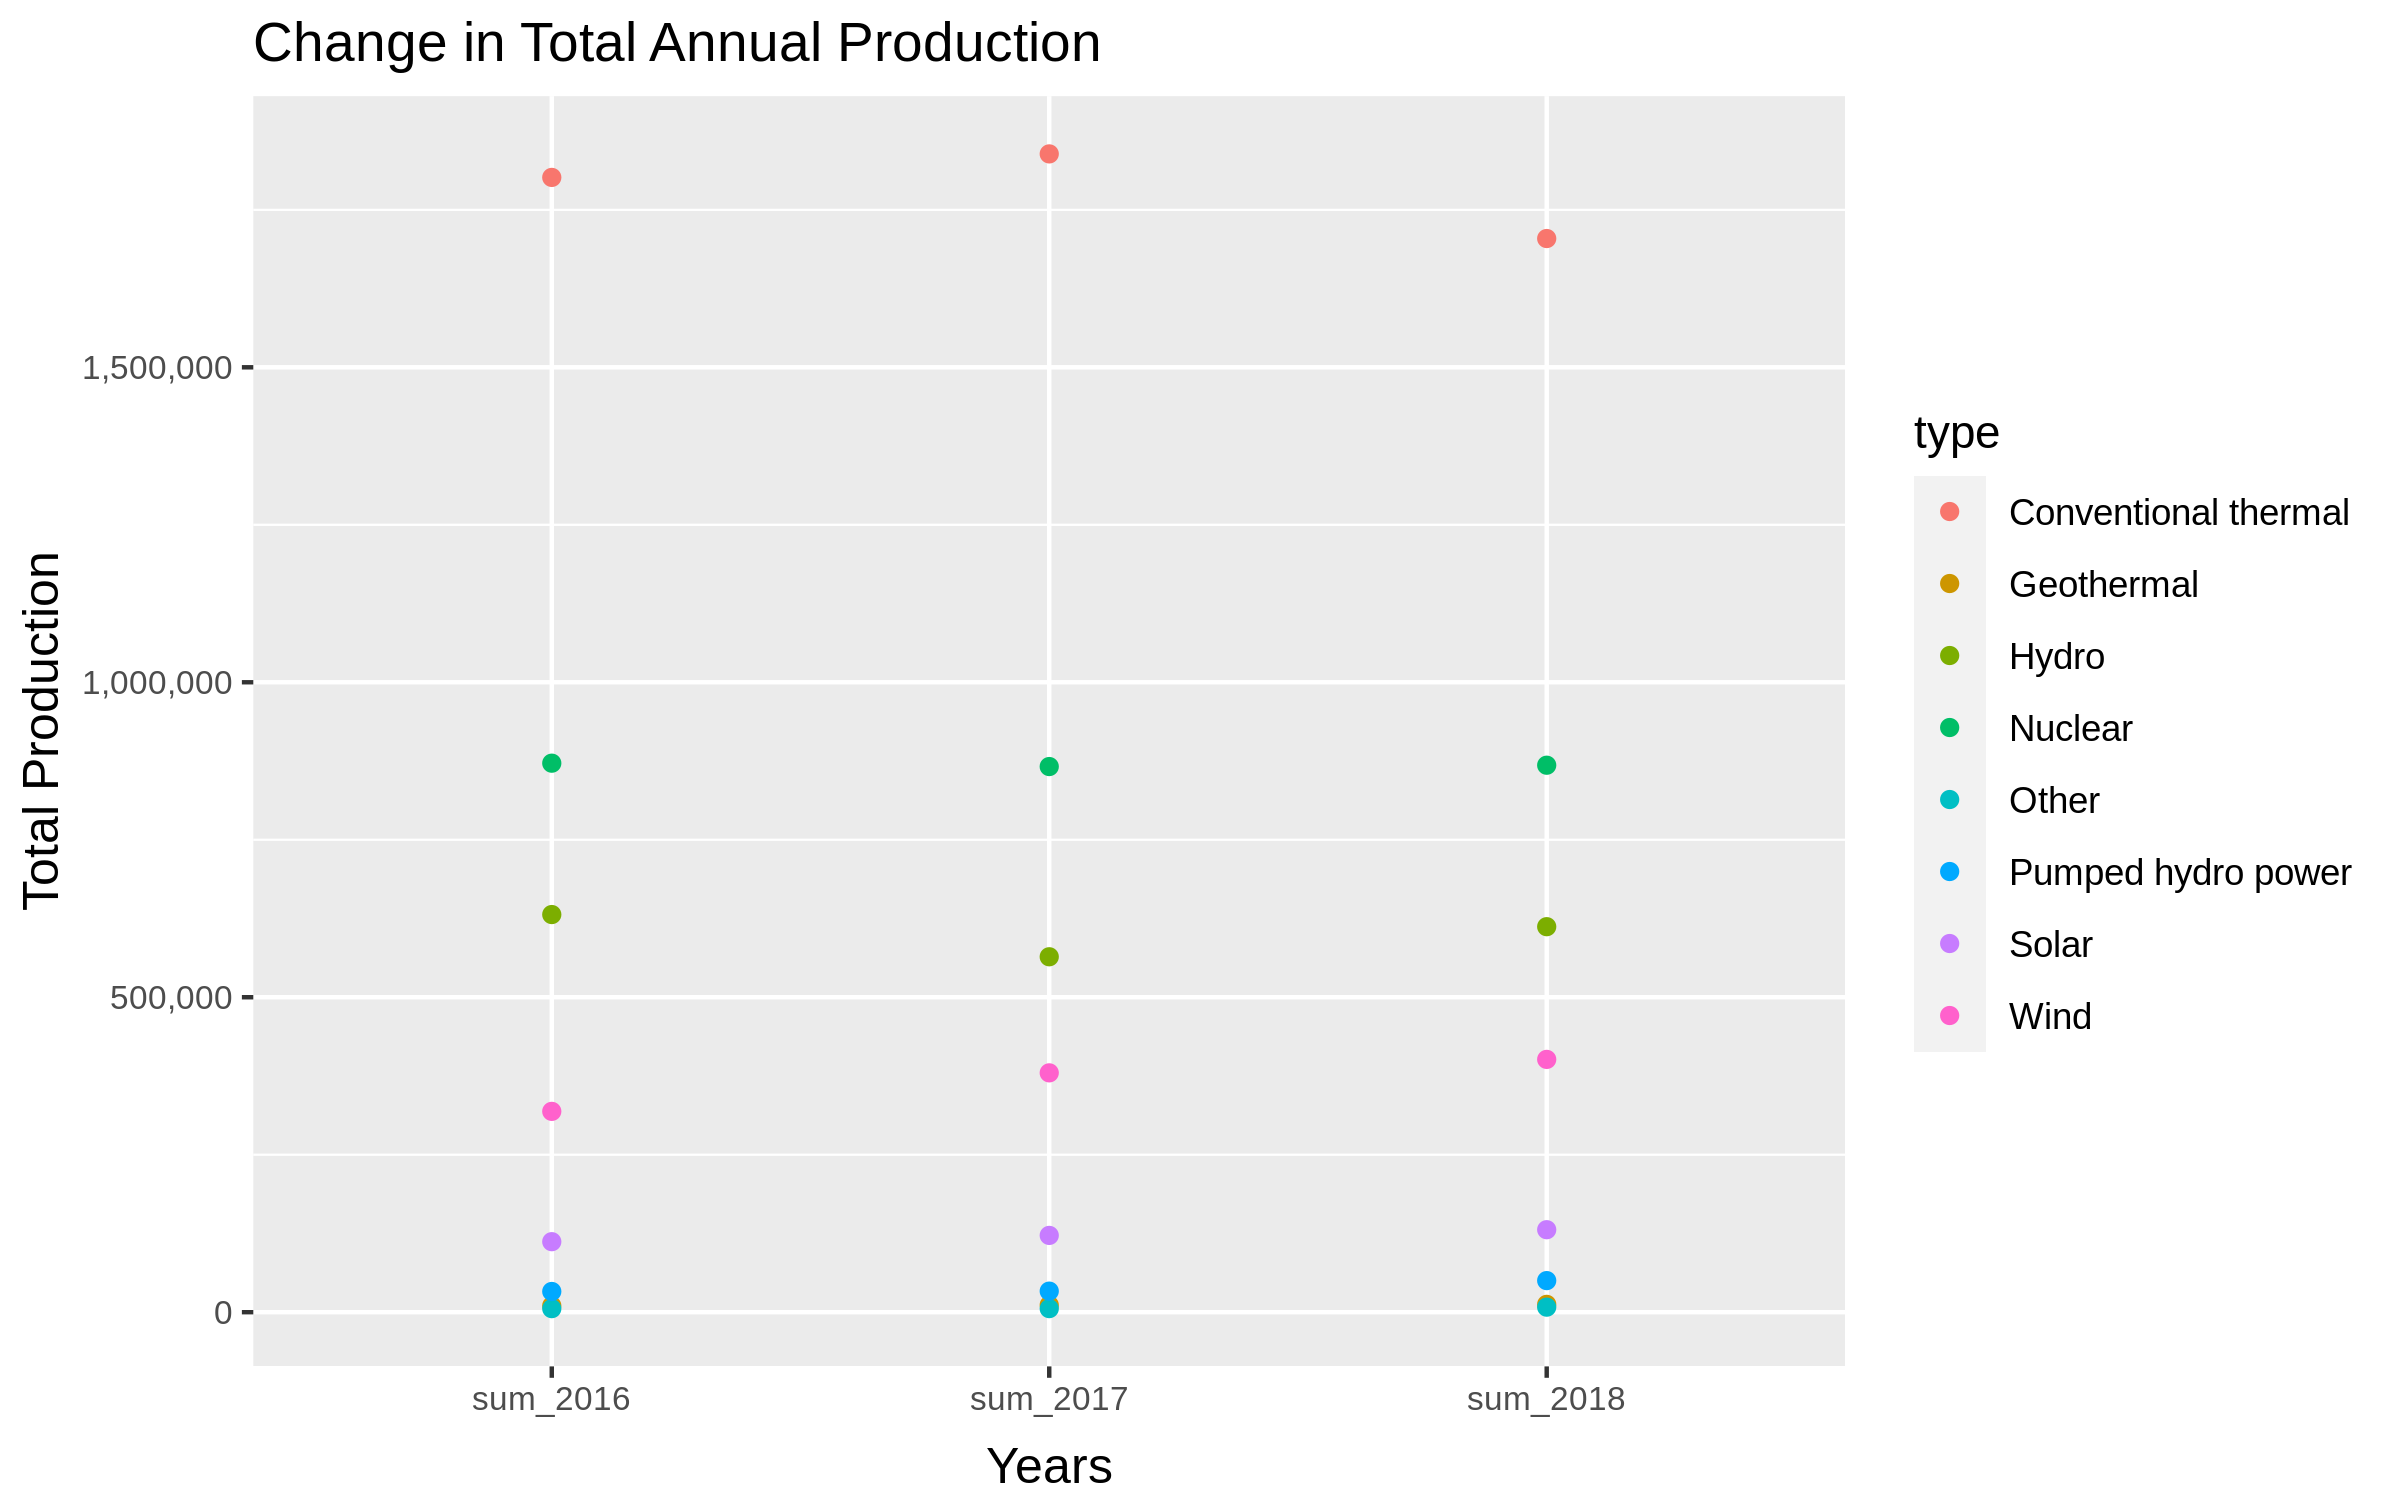

In [7]:
options(repr.plot.width=8, repr.plot.height=5, repr.plot.res = 300)

p_change = ggplot(data_type_sum_pivot, aes(x = name, y = value, color = type)) + 
        geom_point() + 
        labs(title = 'Change in Total Annual Production', x = 'Years', y = 'Total Production') + 
        scale_y_continuous(labels = comma_format()) +
        theme(axis.text = element_text(size = 8), axis.title.x = element_text(size = 12, vjust = -0.5), axis.title.y = element_text(size = 12, vjust = 1))

p_change

From the figure above, we can clearly see the changes in the production of these 8 types of energy over the years. We can find that the output of wind energy has increased year by year from 2016 to 2018, and the production of nuclear energy is relatively the most stable. In 2018, the production of conventional thermal has dropped significantly.

In [8]:
data = data %>% mutate(year_2016_scaled = scales::rescale(year_2016), 
                       year_2017_scaled = scales::rescale(year_2017), 
                       year_2018_scaled = scales::rescale(year_2018))

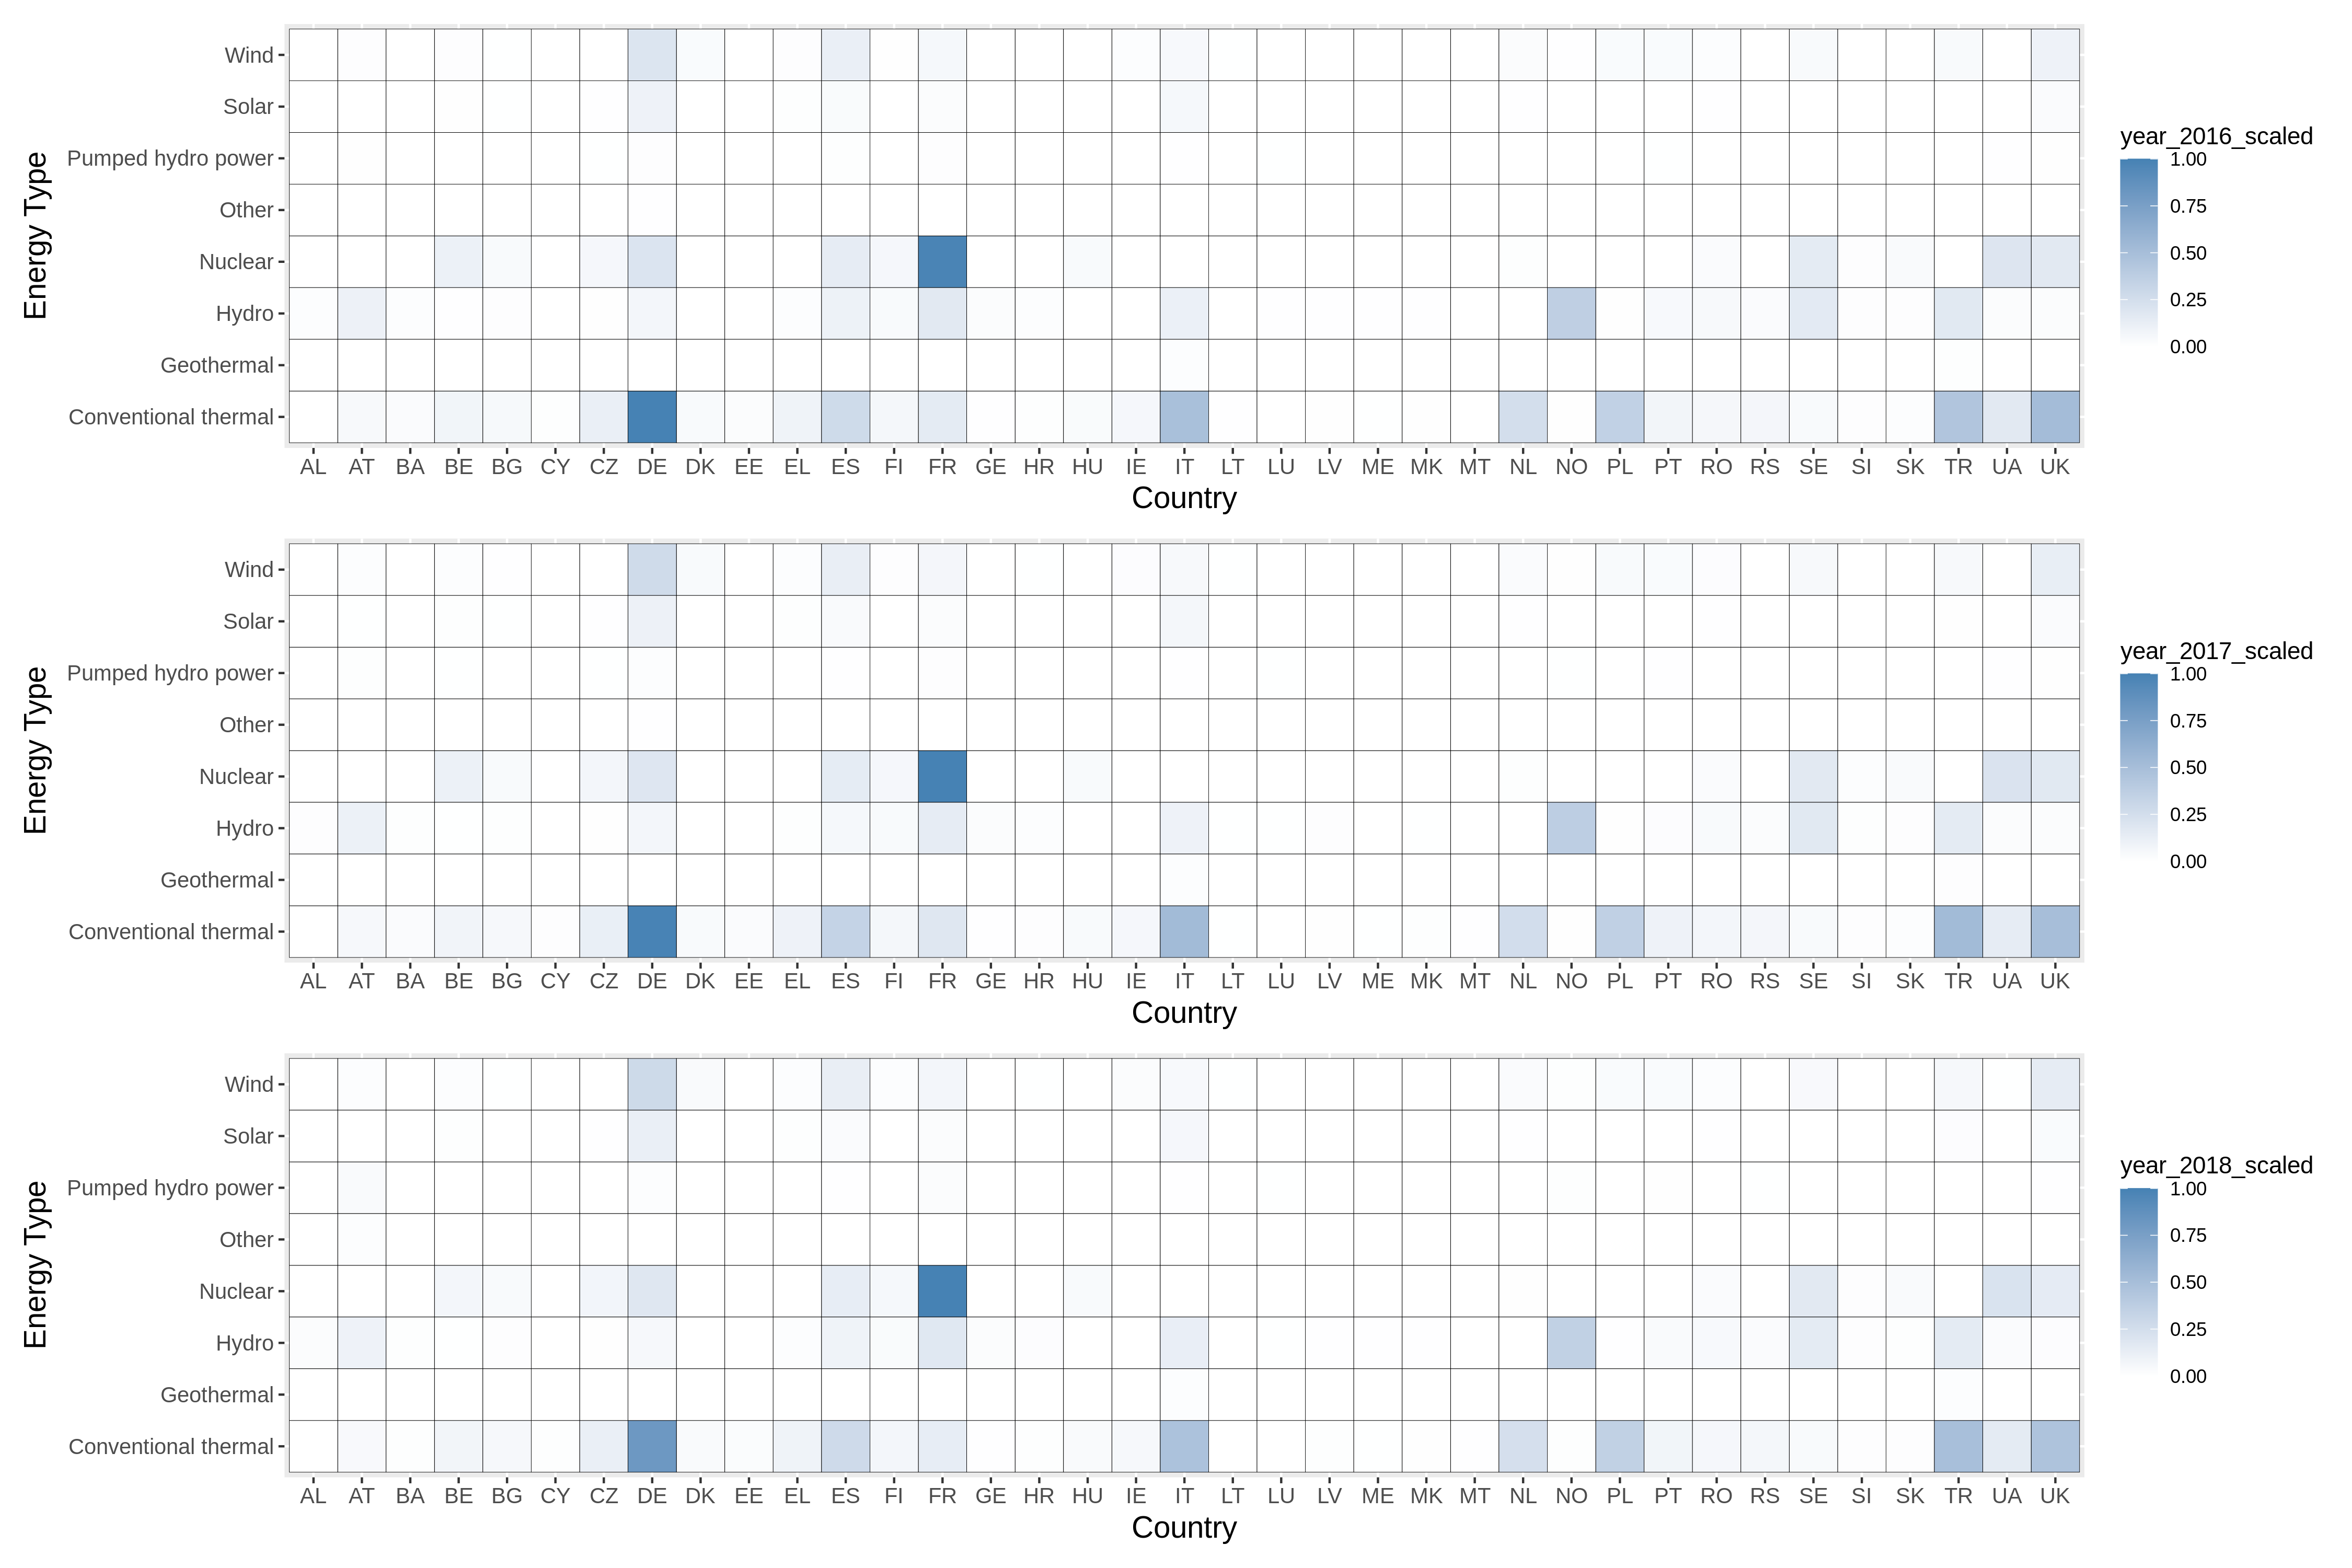

In [9]:
options(repr.plot.width=15, repr.plot.height=10, repr.plot.res = 300)

p_tile_2016 = ggplot(data, aes(x = country, y = type, fill = year_2016_scaled)) + geom_tile(color = 'black') +
            scale_fill_gradient(low = "white", high = "steelblue") + 
            labs(x = 'Country', y = 'Energy Type') + 
            theme(axis.text = element_text(size = 10), axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14, vjust = 1))

p_tile_2017 = ggplot(data, aes(x = country, y = type, fill = year_2017_scaled)) + geom_tile(color = 'black') +
            scale_fill_gradient(low = "white", high = "steelblue") + 
            labs(x = 'Country', y = 'Energy Type') + 
            theme(axis.text = element_text(size = 10), axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14, vjust = 1))

p_tile_2018 = ggplot(data, aes(x = country, y = type, fill = year_2018_scaled)) + geom_tile(color = 'black') +
            scale_fill_gradient(low = "white", high = "steelblue") + 
            labs(x = 'Country', y = 'Energy Type') + 
            theme(axis.text = element_text(size = 10), axis.title.x = element_text(size = 14), axis.title.y = element_text(size = 14, vjust = 1))

p_tile_2016 / p_tile_2017 / p_tile_2018

From the figure above, we can see that in Europe, in 2016, 2017 and 2018, Germany(DE) had the highest production of conventional thermal energy, and France had the highest production of nuclear energy.